In [24]:
#import important libraries
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Read the CSV file into a pandas dataframe. (1 pt)

In [11]:
BikeCounter_DF = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
BikeCounter_DF.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Add columns to the dataframe containing: ( 3 pt)

In [19]:
#The total (East + West) bicycle count
#seems this was already given
BikeCounter_DF.columns = ['Total', 'East', 'West']
#BikeCounter_DF.columns_test = ['Total', 'East', 'West']
BikeCounter_DF.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [32]:
BikeCounter_DF_test = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv', parse_dates=True)
BikeCounter_DF_test.columns = ['Date', 'Total', 'East', 'West']

#referenced this:
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
#The hour
BikeCounter_DF_test['Hour'] = pd.DatetimeIndex(BikeCounter_DF_test['Date']).hour
#The year
BikeCounter_DF_test['Year'] = pd.DatetimeIndex(BikeCounter_DF_test['Date']).year
BikeCounter_DF_test.head()

,Date,Total,East,West,Hour,Year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,4,2012


Create a dataframe with the subset of data from the year 2016 (1 pt)

In [34]:
#referenced this
#https://stackoverflow.com/questions/46878156/pandas-filter-dataframe-rows-with-a-specific-year
#include = df[df.Date.year == year]
BikeCounter_2016_DF = BikeCounter_DF_test[BikeCounter_DF_test.Year == 2016]
BikeCounter_2016_DF.head()

,Date,Total,East,West,Hour,Year
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,0,2016
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,1,2016
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,2,2016
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,3,2016
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,4,2016


Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

In [41]:
y = [ i+1 for i in range(24) ]
#np.reshape(y, (1, 0))
y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [36]:
y2 = [ 2,4,6,8,10,12,14,16,18,20 ]
y2

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [ ]:
#hmmmmm
y = [i+1 for i in range(24)]
#x = [BikeCounter_2016_DF[BikeCounter_2016_DF.Hour == i+1] for i in range(len(y))]


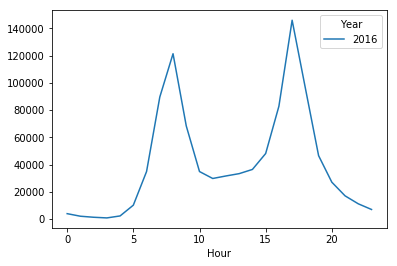

In [44]:
#reference this solution:
#https://stackoverflow.com/questions/43585988/python-pandas-sum-by-hour-of-day

df = BikeCounter_2016_DF
#df = df.groupby([df['Hour'])['Total'].sum().unstack().plot()
df = df.groupby([df['Hour'], 'Year'])['Total'].sum().unstack().plot()

Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

In [94]:
df = BikeCounter_2016_DF
#df.groupby([df['Hour'], 'Year'])['Total'].mean().unstack().plot()
df.groupby([df['Hour'], 'Year'])['Total'].mean().max()

399.0327868852459

In [92]:
df = df.groupby([df['Hour'], 'Year'])['Total'].mean()

In [93]:
df

Hour  Year
0     2016     10.683060
1     2016      5.532787
2     2016      3.465753
3     2016      2.133880
4     2016      6.120219
5     2016     27.743169
6     2016     95.306011
7     2016    244.874317
8     2016    331.797814
9     2016    186.792350
10    2016     95.234973
11    2016     81.308743
12    2016     86.377049
13    2016     91.043716
14    2016     99.483607
15    2016    131.426230
16    2016    226.333333
17    2016    399.032787
18    2016    262.721311
19    2016    127.125683
20    2016     73.841530
21    2016     46.450820
22    2016     30.450820
23    2016     19.073770
Name: Total, dtype: float64

In [81]:
df.iloc[2]

3.4657534246575343

In [85]:
df.columns = ['Hour', 'Year', 'test']

In [86]:
#df.columns = ['Hour', 'Year', 'Average']
df[df['test']==df['test'].max()]
df[df['Value']==df['Value'].max()]

KeyError: 'test'

In [56]:
BikeCounter_DF_test.head()

,Date,Total,East,West,Hour,Year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,4,2012


In [17]:
data.fillna(0, inplace=True)

#The hour of the day
#Trying solution found here 
#https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly



Hour = BikeCounter_DF_test.Date.hour
pd.concat([BikeCounter_DF_test, pd.DataFrame(Hour, index=BikeCounter_DF_test.Date)], axis = 1)
BikeCounter_DF_test.head()

#The year

AttributeError: 'DataFrame' object has no attribute 'Date'

In [21]:
#trying solution found here:
#https://stackoverflow.com/questions/53045867/extracting-the-hour-from-a-time-column-in-pandas

BikeCounter_DF_test['Hour'] = pd.to_datetime(BikeCounter_DF_test['Date'], format='%Y-%m-%d').dt.hour

KeyError: 'Date'

In [31]:
#The year
BikeCounter_DF_test['Year'] = pd.DatetimeIndex(BikeCounter_DF_test['Date']).year

In [ ]:
# first some standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot styling
import numpy as np

data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');
